<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Data-Analytics-in-R/blob/main/EDA_basics_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary:

Import libraries

1) Exploring Categorical Data

A) Create contingency table between two variables type factor (categorical)

Change data type
Contingency Table
Plot contingeny table as bar plots.

B) Proportion Contingency table

Table of Joint proportions
Table 100% sum on columns
Table 100% sum on columns
100% stacked bar plots showing proportions


C) Bar chart for showing distribution of a categorical variable

Reordering categorical variable levels on x axis

D) Conditional Bar chart with fill or with faceting

d1) Bar plot + faceting on another categorical variable
d2) Bar chart with fill with another categorical variable (stacked or not)

2) Exploring numerical data

A) Histogram, faceted histogrm
B) Boxplots and density plots
C) 3 variable Histogram with faceting

4) Characteristics of a distribution

4)A) Calculate center measures
4)B) Calculate variability measures
4)C) Shape
Transformations when highly skewed
4)D) Outliers


# Import libraries

In [ ]:
# Load  
library(dplyr)
library(ggplot2)
library(tidyr)

In [ ]:
link = "https://assets.datacamp.com/production/repositories/537/datasets/8860af2c0ef67fc77a8c704a73bbb93a395debcf/comics.csv"

comics = read.csv(link)

str(comics)
head(comics,2)

'data.frame':	23272 obs. of  11 variables:
 $ name        : chr  "Spider-Man (Peter Parker)" "Captain America (Steven Rogers)" "Wolverine (James \\\"Logan\\\" Howlett)" "Iron Man (Anthony \\\"Tony\\\" Stark)" ...
 $ id          : chr  "Secret" "Public" "Public" "Public" ...
 $ align       : chr  "Good" "Good" "Neutral" "Good" ...
 $ eye         : chr  "Hazel Eyes" "Blue Eyes" "Blue Eyes" "Blue Eyes" ...
 $ hair        : chr  "Brown Hair" "White Hair" "Black Hair" "Black Hair" ...
 $ gender      : chr  "Male" "Male" "Male" "Male" ...
 $ gsm         : chr  NA NA NA NA ...
 $ alive       : chr  "Living Characters" "Living Characters" "Living Characters" "Living Characters" ...
 $ appearances : int  4043 3360 3061 2961 2258 2255 2072 2017 1955 1934 ...
 $ first_appear: chr  "Aug-62" "Mar-41" "Oct-74" "Mar-63" ...
 $ publisher   : chr  "marvel" "marvel" "marvel" "marvel" ...


,name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NA,Living Characters,4043,Aug-62,marvel
2,Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NA,Living Characters,3360,Mar-41,marvel


# 1) Exploring Categorical Data

# A) Create contingency table between two variables type factor (categorical)

## Change data type

In [ ]:
comics$align = as.factor(comics$align)

comics$gender = as.factor(comics$gender)

# Check levels of align
levels(comics$align)

# Check the levels of gender
levels(comics$gender)

[1] "Bad"                "Good"               "Neutral"           
[4] "Reformed Criminals"

[1] "Female" "Male"   "Other"

## Contingency Table 

In [ ]:
# Create a 2-way contingency table
table(comics$align, comics$gender)

                    
                     Female Male Other
  Bad                  1573 7561    32
  Good                 2490 4809    17
  Neutral               836 1799    17
  Reformed Criminals      1    2     0

There are some levels that have very low counts. To simplify the analysis, it often helps to drop such levels.

In [ ]:
# Remove align level
comics <- comics %>%
  filter(align != "Reformed Criminals") %>%
  droplevels()

# Check levels of align
levels(comics$align)

# Create a 2-way contingency table
table(comics$align, comics$gender)

[1] "Bad"     "Good"    "Neutral"

         
          Female Male Other
  Bad       1573 7561    32
  Good      2490 4809    17
  Neutral    836 1799    17

## Plot contingeny table as bar plots.

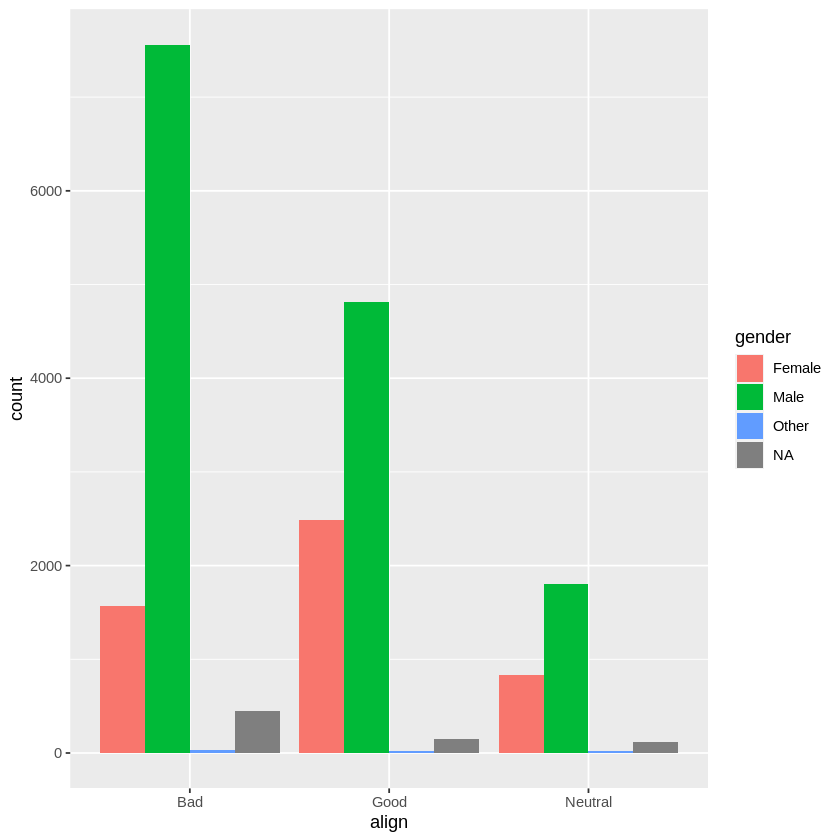

In [ ]:
# Create side-by-side barchart of gender by alignment
ggplot(comics, aes(x = align, fill = gender)) + 
  geom_bar(position = "dodge")


now we plot x as gender and align in fill.

Rotation of the x axis labels 90 degrees to help readability.

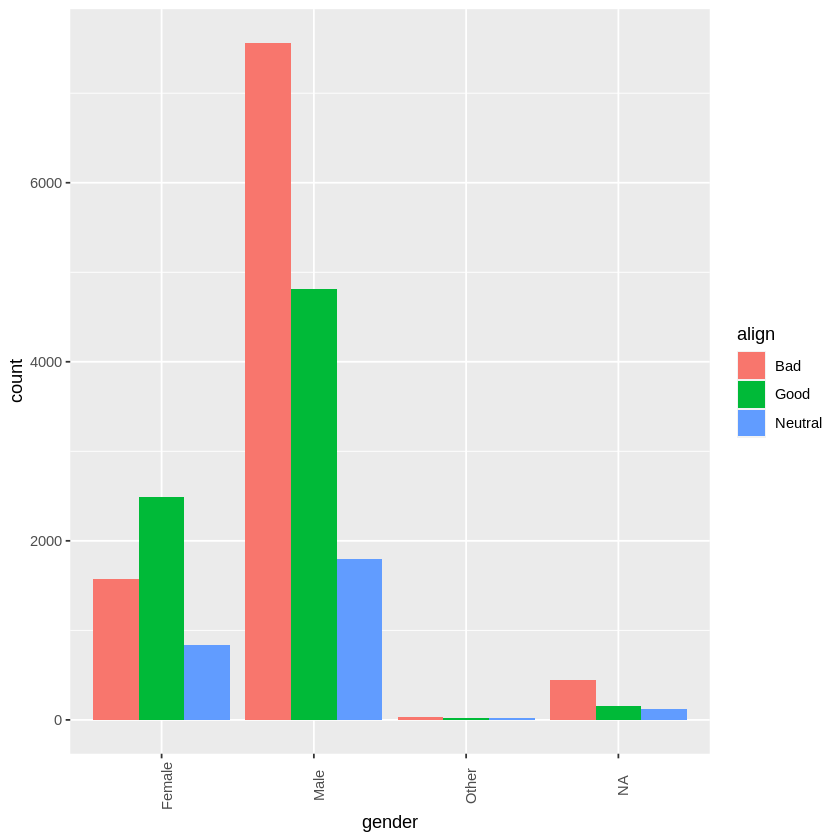

In [ ]:
# Create side-by-side barchart of alignment by gender
ggplot(comics, aes(x = gender, fill = align)) + 
  geom_bar(position = "dodge") +
  theme(axis.text.x = element_text(angle = 90))

# B) Proportion Contingency table 

## Table of Joint proportions

In [ ]:
tab <- table(comics$align, comics$gender)
options(scipen = 999, digits = 3) # Print fewer digits
prop.table(tab)     # Joint proportions

         
            Female     Male    Other
  Bad     0.082210 0.395160 0.001672
  Good    0.130135 0.251333 0.000888
  Neutral 0.043692 0.094021 0.000888

## Table 100% sum on columns

What proportion of all female characters are good? Aprox 50,8%

In [ ]:
prop.table(tab, 2)  # Conditional on columns  

         
          Female  Male Other
  Bad      0.321 0.534 0.485
  Good     0.508 0.339 0.258
  Neutral  0.171 0.127 0.258

## Table 100% sum on columns

In [ ]:
prop.table(tab, 1)  # Conditional on rows

         
           Female    Male   Other
  Bad     0.17161 0.82490 0.00349
  Good    0.34035 0.65733 0.00232
  Neutral 0.31523 0.67836 0.00641

## 100% stacked bar plots showing proportions

By adding position = "fill" to geom_bar(), you are saying you want the bars to fill the entire height of the plotting window, thus displaying proportions and not raw counts.

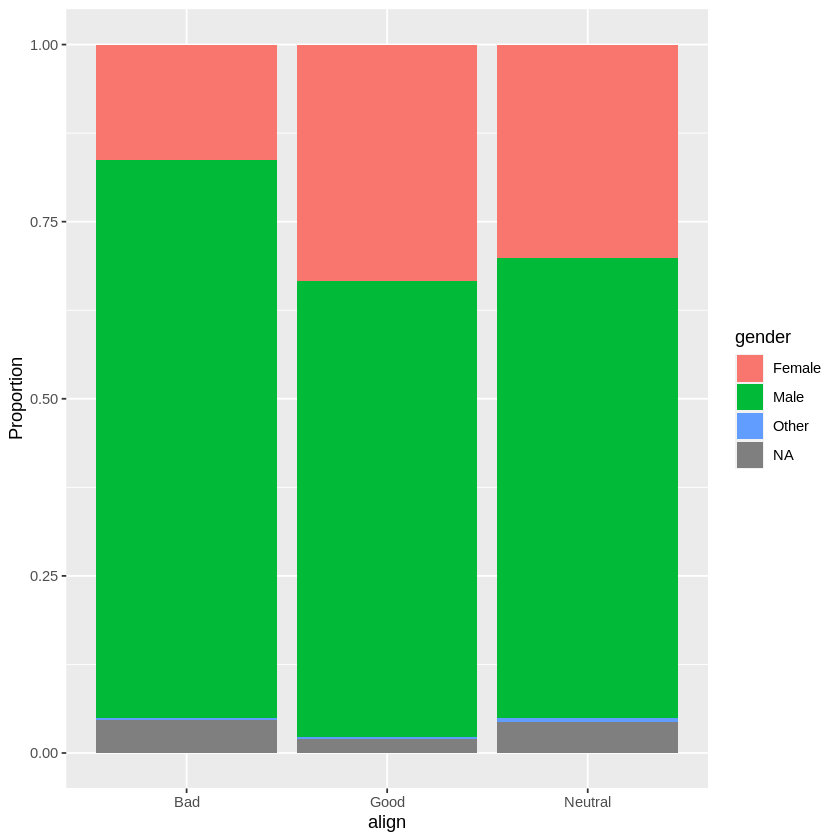

In [ ]:
# Plot proportion of gender, conditional on align
ggplot(comics, aes(x = align, fill = gender)) + 
  geom_bar(position = "fill") +
  ylab("Proportion")

# C) Bar chart for showing distribution of a categorical variable

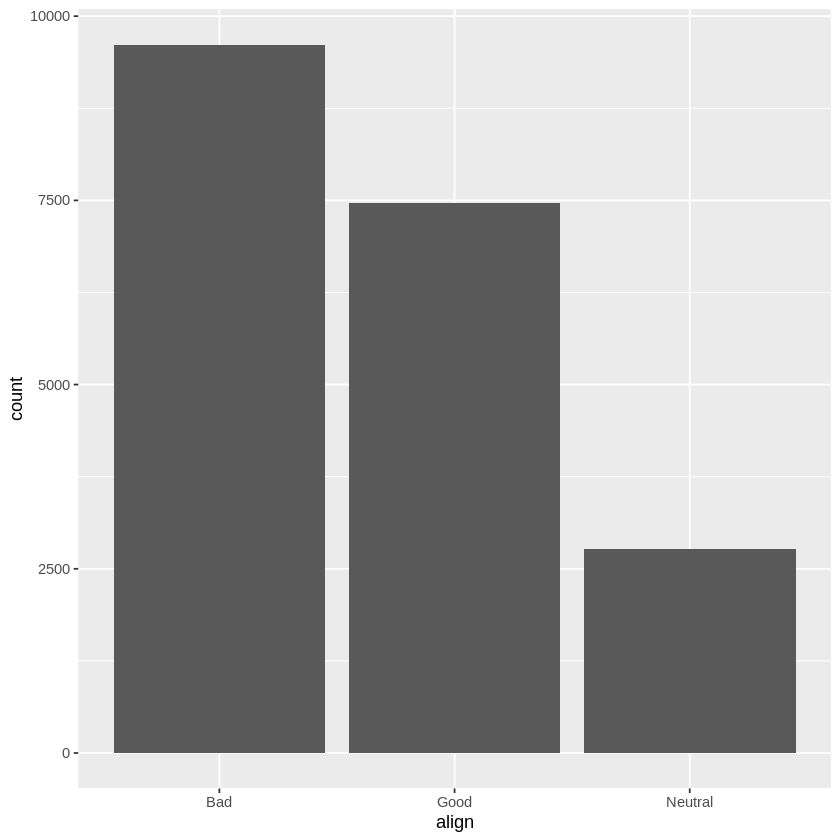

In [ ]:
# Create plot of align
ggplot(comics, aes(x = align)) + 
  geom_bar()

## Reordering categorical variable levels on x axis

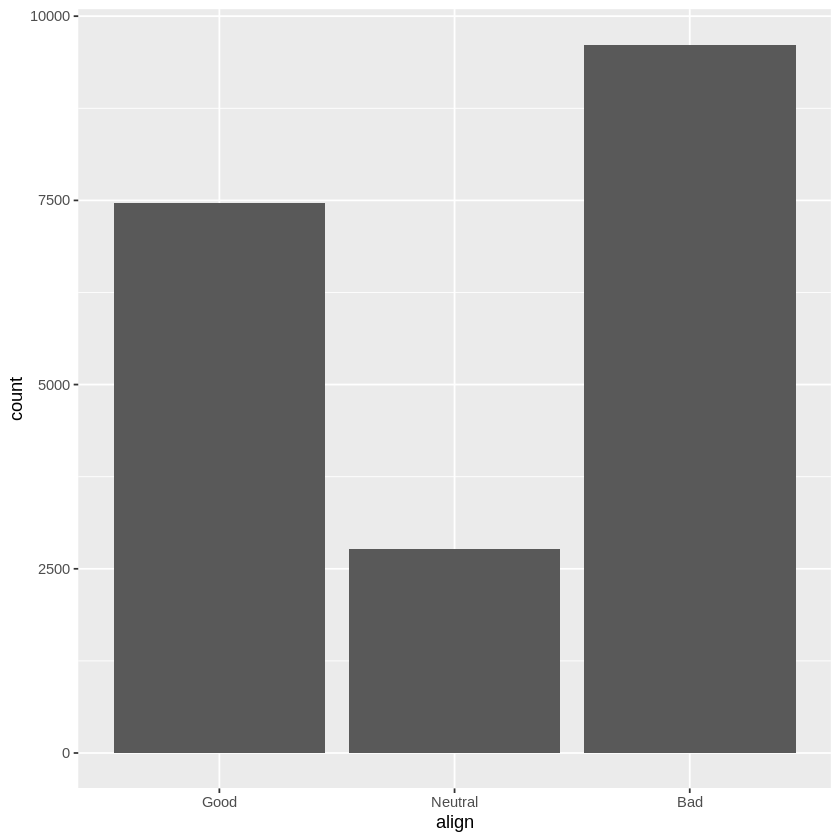

In [ ]:
# Change the order of the levels in align
comics$align <- factor(comics$align, 
                       levels = c("Good", "Neutral", "Bad"))

# Create plot of align
ggplot(comics, aes(x = align)) + 
  geom_bar()

# D) Conditional Bar chart with fill or with faceting

## d1) Bar plot + faceting on another categorical variable

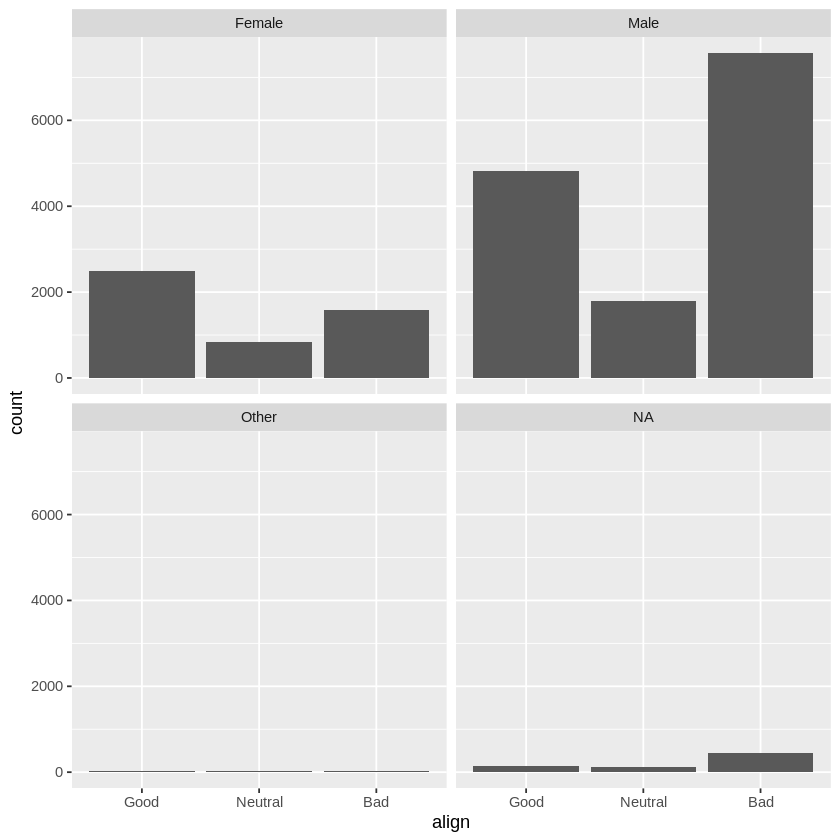

In [ ]:
# Plot of alignment broken down by gender
ggplot(comics, aes(x = align)) + 
  geom_bar() +
  facet_wrap(~ gender)

## d2) Bar chart with fill with another categorical variable (stacked or not)

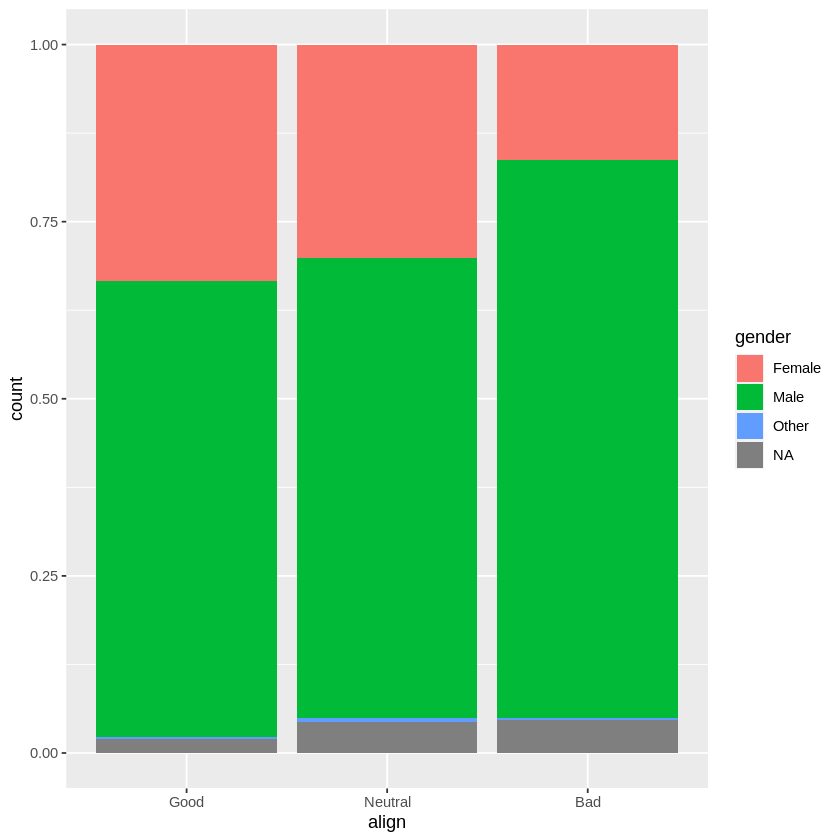

In [ ]:
# Plot of alignment broken down by gender
ggplot(comics, aes(x = align, fill=gender)) + 
  geom_bar(position = "fill")

# 2) Exploring numerical data

In [ ]:
cars = read.csv("https://assets.datacamp.com/production/repositories/537/datasets/c0366d5da5ee8dce49919a5443685cf2e50c6a96/cars04.csv")

str(cars)

'data.frame':	428 obs. of  19 variables:
 $ name       : chr  "Chevrolet Aveo 4dr" "Chevrolet Aveo LS 4dr hatch" "Chevrolet Cavalier 2dr" "Chevrolet Cavalier 4dr" ...
 $ sports_car : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ suv        : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ wagon      : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ minivan    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ pickup     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ all_wheel  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ rear_wheel : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ msrp       : int  11690 12585 14610 14810 16385 13670 15040 13270 13730 15460 ...
 $ dealer_cost: int  10965 11802 13697 13884 15357 12849 14086 12482 12906 14496 ...
 $ eng_size   : num  1.6 1.6 2.2 2.2 2.2 2 2 2 2 2 ...
 $ ncyl       : int  4 4 4 4 4 4 4 4 4 4 ...
 $ horsepwr   : int  103 103 140 140 140 132 132 130 110 130 ...
 $ city_mpg   : int  28 28 26 26 26 29 29 26 27 26 ...
 $ hwy_mp

## A) Histogram, faceted histogrm 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”


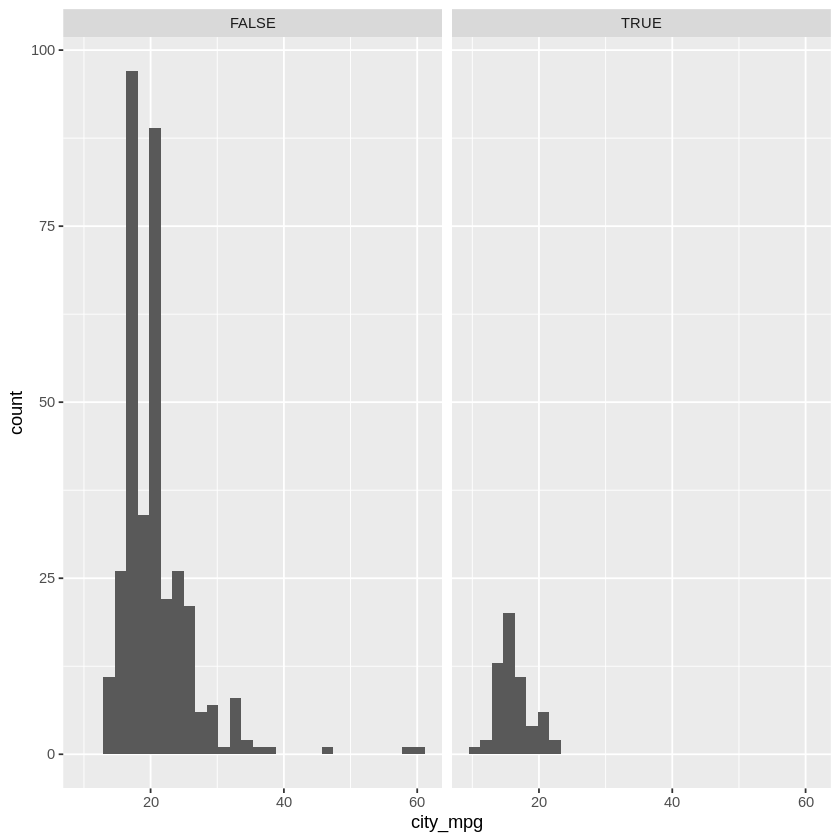

In [ ]:
# Create faceted histogram
ggplot(cars, aes(x = city_mpg)) +
  geom_histogram() +
  facet_wrap(~ suv)

Marginal and conditional histograms interpretation

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


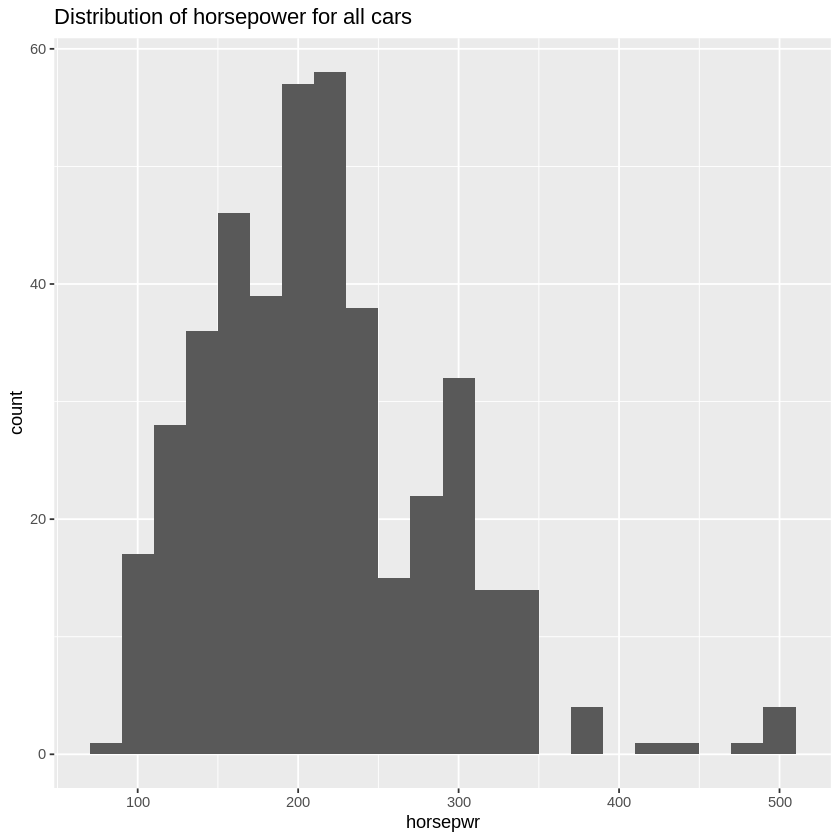

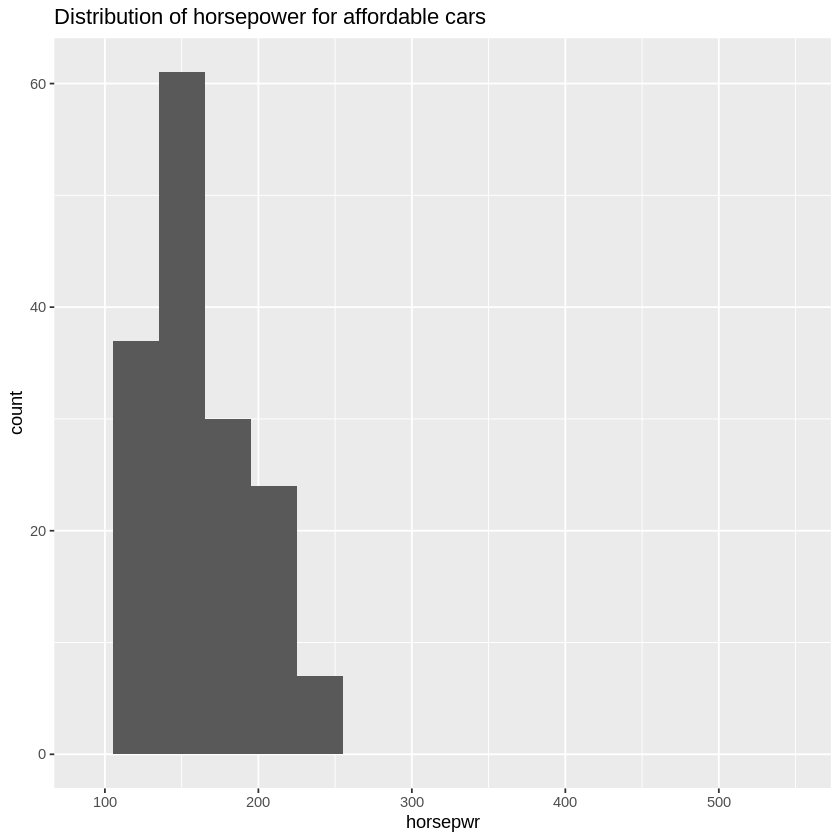

In [ ]:
# Create hist of horsepwr
cars %>%
  ggplot(aes(x = horsepwr)) +
  geom_histogram(binwidth = 20) +
  ggtitle("Distribution of horsepower for all cars")

# Create hist of horsepwr for affordable cars
cars %>%
  filter(msrp < 25000) %>%
  ggplot(aes(x = horsepwr)) +
  geom_histogram(binwidth = 30) +
  xlim(c(90, 550)) +
  ggtitle("Distribution of horsepower for affordable cars")

We can see there are 2 modes in distribution of horspower. 1 around 200 and the other around 300. 

## B) Boxplots and density plots 

Advantage of boxplot is detecting outliers, but it does not detect if in distribution there are different modes (Unimodal/Bimodal/multimodal/Uniform)

Warning message:
“Removed 11 rows containing non-finite values (stat_boxplot).”


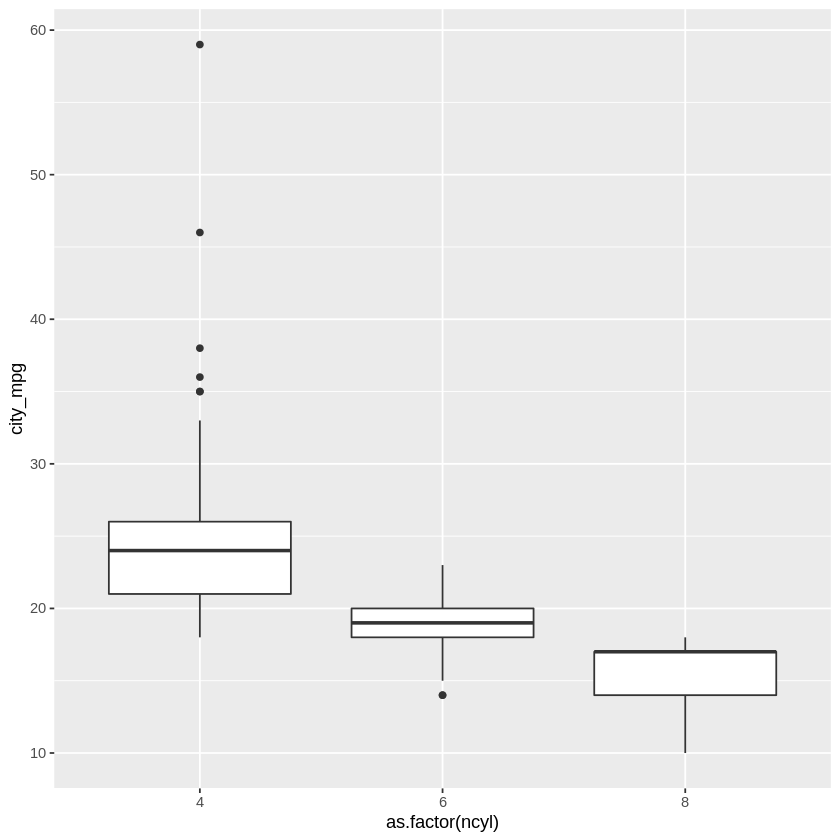

In [ ]:
# Filter cars with 4, 6, 8 cylinders
common_cyl <- filter(cars, ncyl %in% c(4, 6, 8))

# Create box plots of city mpg by ncyl
ggplot(common_cyl, aes(x = as.factor(ncyl), y = city_mpg)) +
  geom_boxplot()

Warning message:
“Removed 11 rows containing non-finite values (stat_density).”


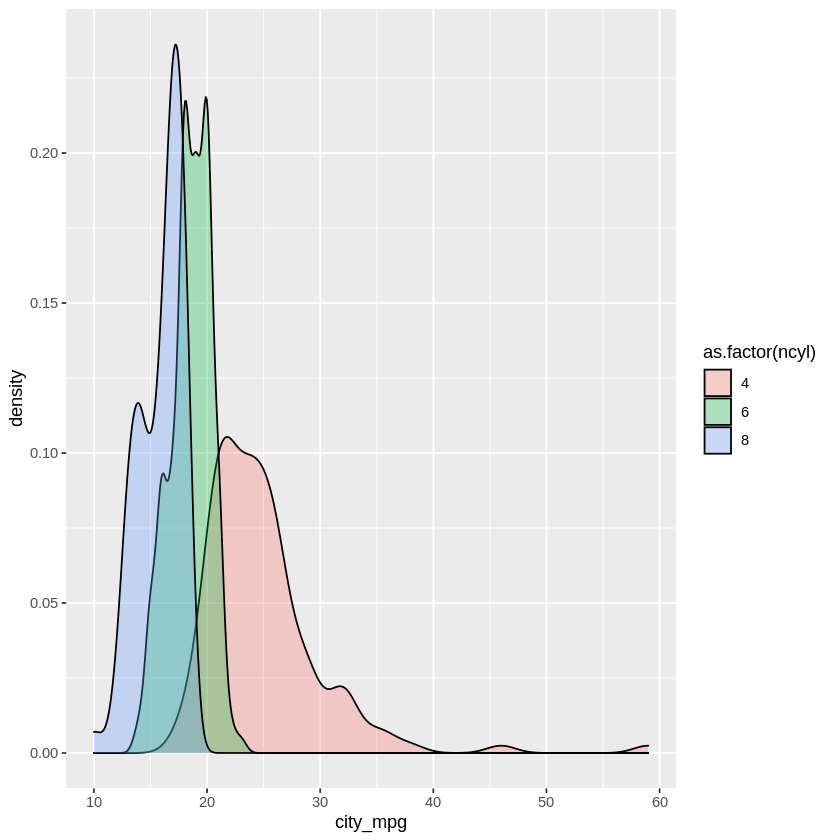

In [ ]:
# Create overlaid density plots for same data
ggplot(common_cyl, aes(x = city_mpg, fill = as.factor(ncyl))) +
  geom_density(alpha = .3)

Warning message:
“Removed 28 rows containing non-finite values (stat_density).”


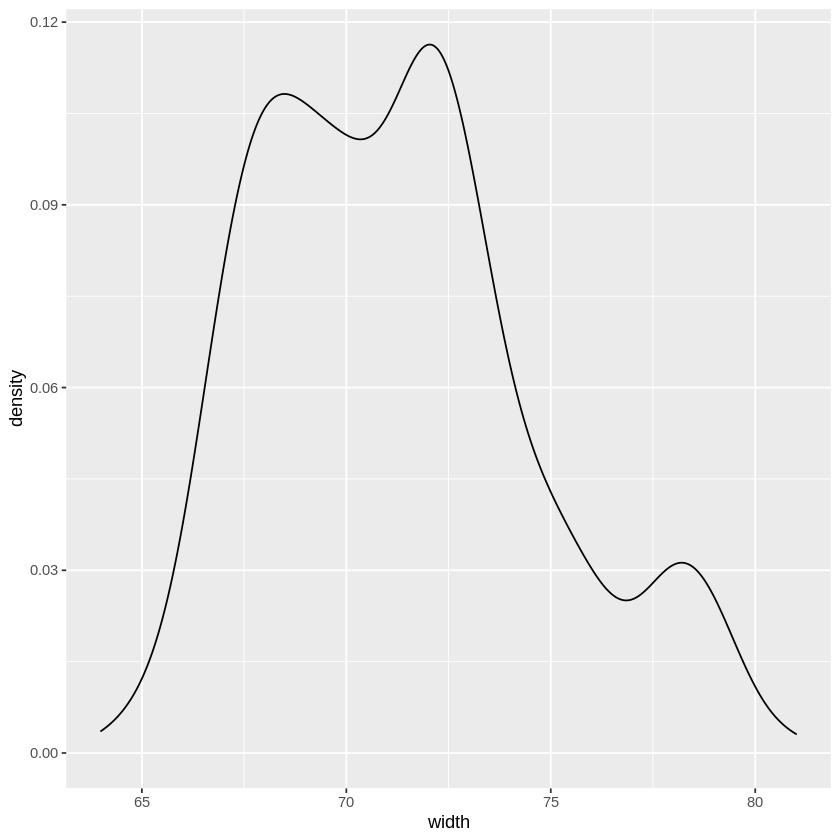

In [ ]:
# Create plot of width
cars %>% 
  ggplot(aes(x = width)) +
  geom_density()

## C) 3 variable Histogram with faceting

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 11 rows containing non-finite values (stat_bin).”


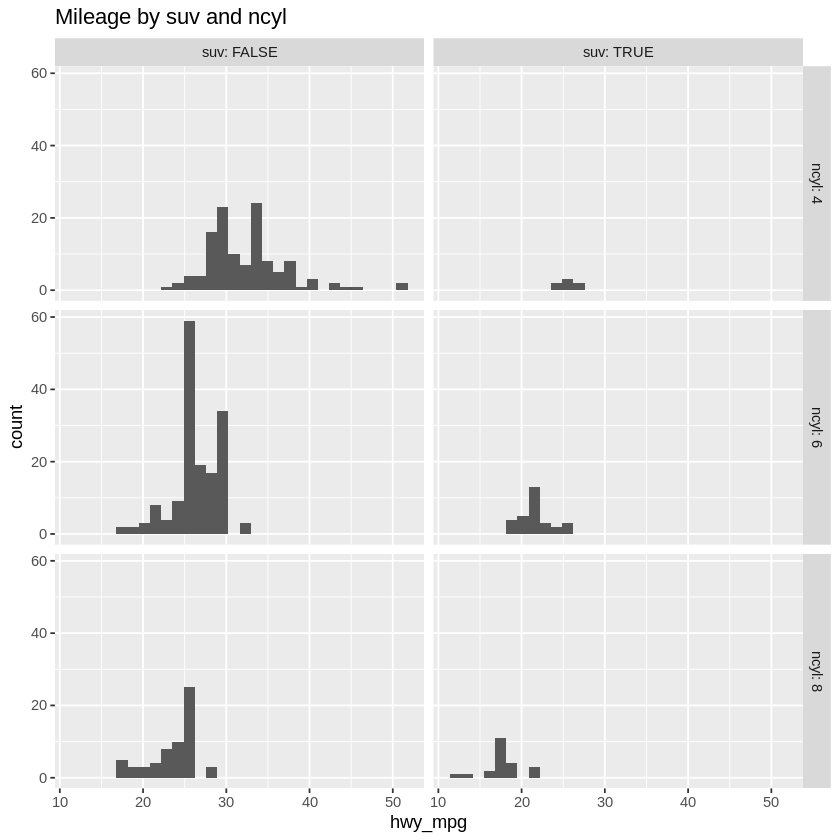

In [ ]:
# Facet hists using hwy mileage and ncyl
common_cyl %>% 
  ggplot(aes(x = hwy_mpg)) +
  geom_histogram() +
  facet_grid(ncyl ~ suv, labeller = label_both) +
  ggtitle("Mileage by suv and ncyl")

# 4) Characteristics of a distribution

## 4)A) Calculate center measures 

In [ ]:
install.packages("gapminder")
library(gapminder)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



continent,mean(lifeExp),median(lifeExp)
<fct>,<dbl>,<dbl>
Africa,54.8,52.9
Americas,73.6,72.9
Asia,70.7,72.4
Europe,77.6,78.6
Oceania,80.7,80.7


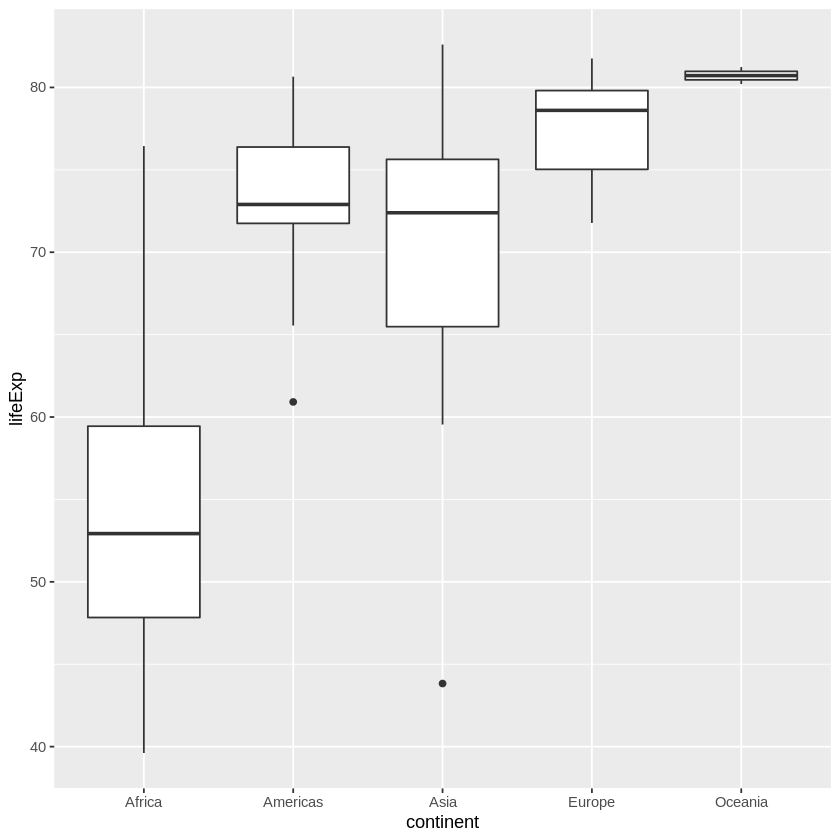

In [ ]:
# Create dataset of 2007 data
gap2007 <- filter(gapminder, year == 2007)

# Compute groupwise mean and median lifeExp
gap2007 %>%
  group_by(continent) %>%
  summarize(mean(lifeExp),
            median(lifeExp))

# Generate box plots of lifeExp for each continent
gap2007 %>%
  ggplot(aes(x = continent, y = lifeExp)) +
  geom_boxplot()

## 4)B) Calculate variability measures 

continent,sd(lifeExp),IQR(lifeExp),n()
<fct>,<dbl>,<dbl>,<int>
Africa,9.631,11.610,52
Americas,4.441,4.632,25
Asia,7.964,10.152,33
Europe,2.980,4.782,30
Oceania,0.729,0.516,2


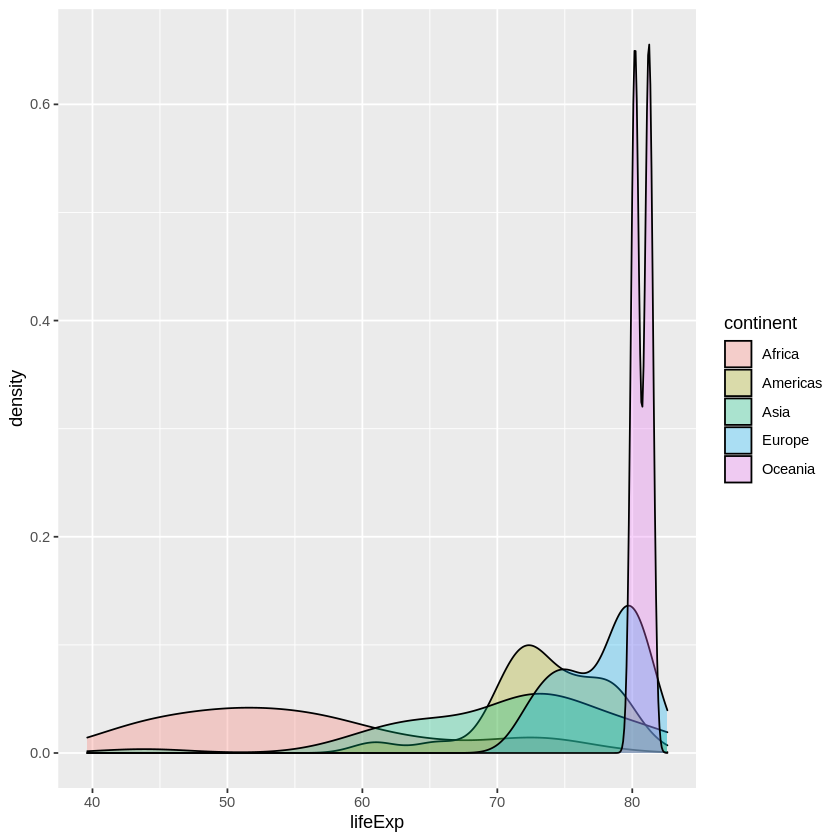

In [ ]:
# Compute groupwise measures of spread
gap2007 %>%
  group_by(continent) %>%
  summarize(sd(lifeExp),
            IQR(lifeExp),
            n())

# Generate overlaid density plots
gap2007 %>%
  ggplot(aes(x = lifeExp, fill = continent)) +
  geom_density(alpha = 0.3)

mean and standard deviation, median and IQR measure the central tendency and spread, respectively, but are robust to outliers and non-normal data.

## 4)C) Shape

#### Transformations when highly skewed

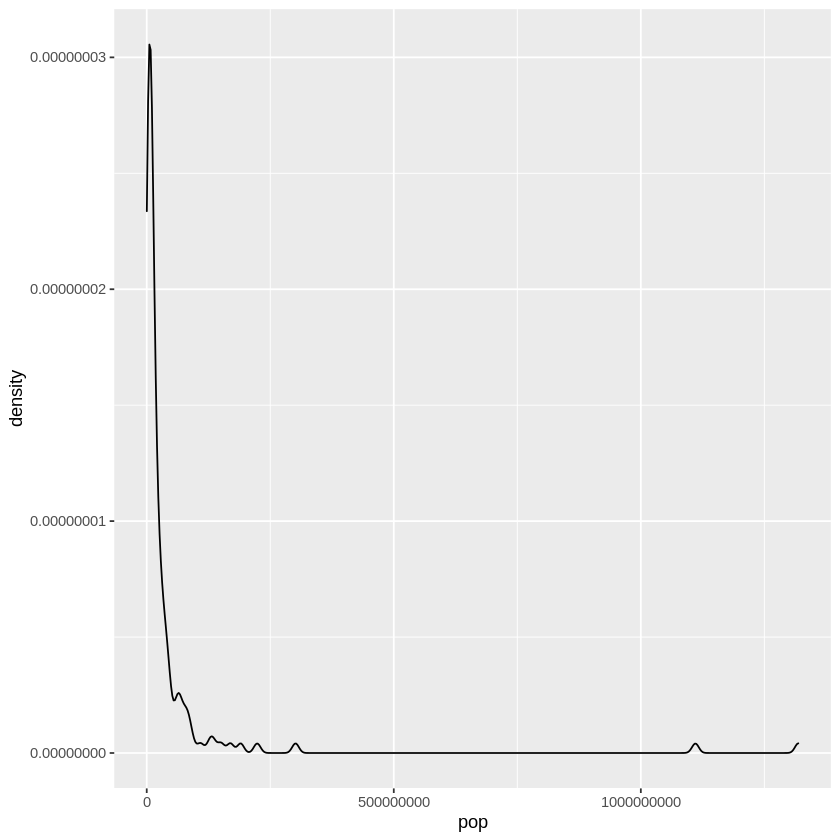

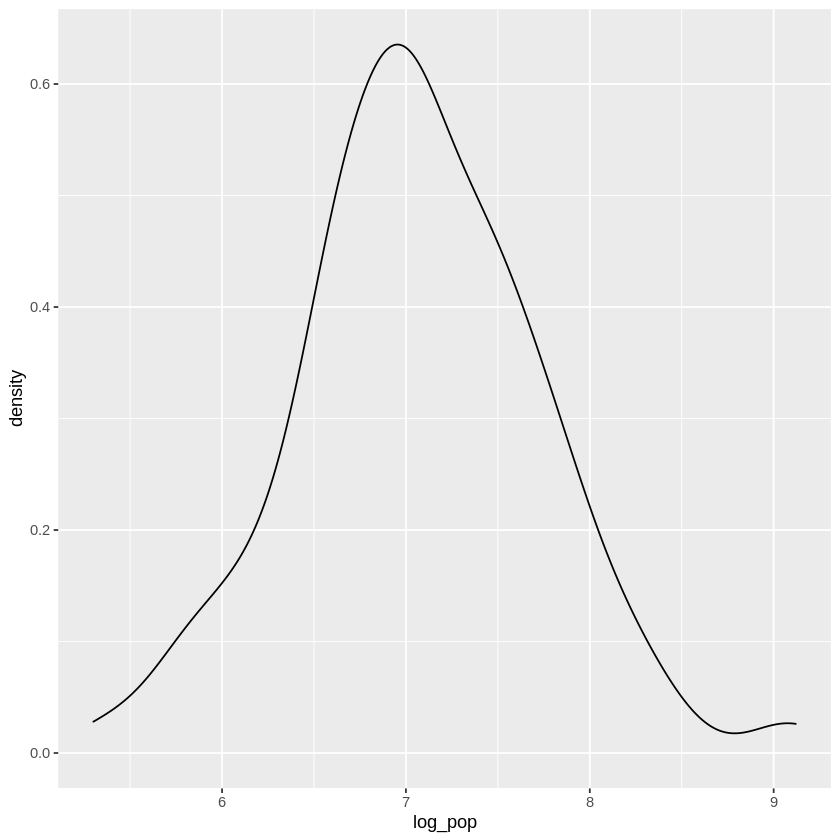

In [ ]:
# Create density plot of old variable
gap2007 %>%
  ggplot(aes(x = pop)) +
  geom_density()

# Transform the skewed pop variable
gap2007 <- gap2007 %>%
  mutate(log_pop = log10(pop))

# Create density plot of new variable
gap2007 %>%
  ggplot(aes(x = log_pop)) +
  geom_density()

## 4)D) Outliers

Use boxplots to Identify outliers

Using a given threshold live 2 times IQR or other

In [ ]:
# Filter for Asia, add column indicating outliers
gap_asia <- gap2007 %>%
  filter(continent == "Asia") %>%
  mutate(is_outlier = lifeExp < 50)

# Remove outliers, create box plot of lifeExp
gap_asia %>% 
  filter(!is_outlier) %>%
  ggplot(aes(x = 1, y = lifeExp)) +
  geom_boxplot()